In [1]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization (plotting)

# to display plots inline (with the rest of the output) rather than in a separate window
%matplotlib inline

[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]


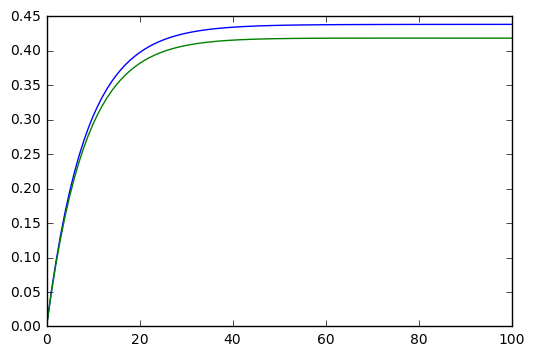

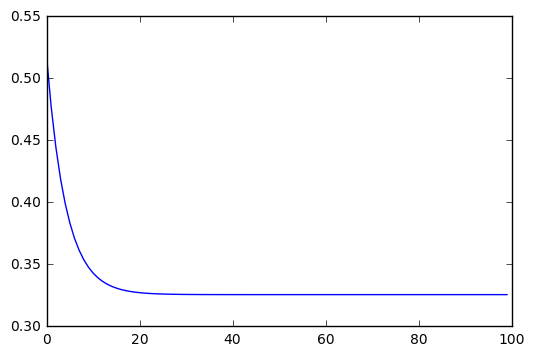

[ 0.438  0.418]


In [2]:
def t(x,y):
    return x or y

class Machine:
    def __init__(self, n):
        self.w = np.zeros(n)
    def h(self, x):
        return (self.w * x).sum(axis=1)

def get_correct_values(x):
    #seed = 125
    #np.random.seed(seed)
    #w = np.random.randint(-5, 6, x.shape[1])
    #w = np.random.randint(-100, 100, x.shape[1])
    #print(w)
    #return (w * x).sum(axis=1)
    ret = []
    for xs in x:
        ret.append(int(xs[0] != xs[1]))
    print(ret)    
    return ret

def gradient_descent(machine, training_set, correct_values, alpha, iterations):
    m = training_set.shape[0]
    n = training_set.shape[1]
    values = []
    values.append(np.copy(machine.w))
    losses = []
    for i in range(0, iterations):
        d = (machine.h(training_set) - correct_values).dot(training_set)
        machine.w -= alpha * d / m
        values.append(np.copy(machine.w))
        losses.append(((machine.h(training_set) - correct_values)**2).sum() / m)
    #print(losses)    
    plt.plot(values)
    plt.show()
    plt.plot(losses)
    plt.show()

def trainer(m, alpha, iterations, seed, n):
    np.random.seed(seed)
    training_set = np.random.randint(0, 2, (m,n))
    #training_set = np.insert(training_set, 0, 1, axis=1)
    #print(training_set)
    correct_values = get_correct_values(training_set)
    machine = Machine(n)
    gradient_descent(machine, training_set, correct_values, alpha, iterations)
    print(np.around(machine.w, decimals=3))

trainer(m = 100, alpha = 0.17, iterations = 100, seed = 5, n = 2)

$$
\begin{align}
\sigma(x) &= \frac{1}{1+e^-x}
\left(\frac{1}{v}\right)' &= -\frac{v'}{v^2}, \qquad \left(e^{f(x)}\right)'=f'(x)e^{f(x)} \\
\\

\\
\sigma'(x) &= \frac{(-1+e^-x)'}{(1+e^-x)^2}
= \frac{1}{1+e^-x} \frac{e^-x}{1+e^-x}
= \sigma(x)\left(\frac{1+e^-x}{1+e^-x}-\frac{1}{1+e^-x}\right)
= \sigma(x)(1-\sigma(x))
\end{align}
$$

In [ ]:
def loss(training_set, correct_values):
    ret = (machine.h(training_set) - correct_values)**2
    print(ret)
    
m = 1
n = 1
np.random.seed(seed)
training_set = np.random.randint(0, 2, (m,n))
#training_set = np.insert(training_set, 0, 1, axis=1)
#print(training_set)
correct_values = get_correct_values(training_set)
machine = Machine(n)